In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/kalicornn/Desktop/preride_data.csv")

In [3]:
# remove timestamp
df = df[df.columns[1:]]
# remove names
df = df.drop(df.columns[33],axis=1)
#df.columns

In [4]:
group_by_system = df.groupby(['System'])

In [5]:
group_by_system.size()

System
Julie    12
Lily     12
dtype: int64

The Julie and Lily groups seem to have very similar views on ride-sharing services such as Lyft and Uber, when looking at the means and ranges of their responses.

In terms of demographics, most of the participants have a bachelor's degree, and the most common occupation is student, although there is a range of occupations represented in the participants. Ages range from 20 to 60, with the mean age of approximately 37.

From an initial analysis, Julie participants used slightly more positive words to describe self-driving vehicles, but it doesn't seem to be a dramatic difference, because many of the words participants used were classified as neutral based on the positive and negative lexicons utilized.
(Julie: mean of 2.857143 vs Lily: mean of 2.555556)

In [6]:
lyft_uber_views = df[df.columns[:8]]
lyft_uber_views = lyft_uber_views.drop(lyft_uber_views.columns[1:4],axis=1)
lyft_uber_views = lyft_uber_views.replace({'Strongly disagree':1,'Disagree':2,'Neutral':3,'Agree':4,'Strongly agree':5})
#lyft_uber_views
lyft_uber_views_group_by_system = lyft_uber_views.groupby(['System'])
lyft_uber_views_group_by_system.mean()

,Please choose the response that best represents your view on taking a Lyft or Uber. [I am usually comfortable being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually feel safe being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust the driver.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust other drivers on the road.]
System,,,,
Julie,4.166667,4.000000,4.00,3.250000
Lily,4.166667,4.083333,3.75,2.833333


In [7]:
lyft_uber_views_group_by_system.min()

,Please choose the response that best represents your view on taking a Lyft or Uber. [I am usually comfortable being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually feel safe being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust the driver.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust other drivers on the road.]
System,,,,
Julie,3,3,3,2
Lily,3,3,3,2


In [8]:
lyft_uber_views_group_by_system.max()

,Please choose the response that best represents your view on taking a Lyft or Uber. [I am usually comfortable being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually feel safe being driven.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust the driver.],Please choose the response that best represents your view on taking a Lyft or Uber. [I usually trust other drivers on the road.]
System,,,,
Julie,5,5,5,4
Lily,5,5,5,4


In [9]:
demographics = df.drop(df.columns[1:-4],axis=1)
demographics[demographics.columns[-1]].mode() # most common degree

0    Bachelor's degree
dtype: object

In [10]:
demographics[demographics.columns[-1]].value_counts()

Bachelor's degree       10
Doctoral degree          6
Master's degree          5
Post-doctoral degree     2
High school diploma      1
Name: Highest level of education you have completed or currently pursuing, dtype: int64

In [11]:
demographics[demographics.columns[-2]].mode() # most common occupation

0    Student
dtype: object

In [12]:
demographics[demographics.columns[-2]].str.lower().value_counts()

student                           5
graduate student                  2
phd student                       2
editor                            1
it                                1
marketing manager                 1
accounting                        1
software                          1
alumni relations manager (saa)    1
dental hygienist                  1
academic advisor                  1
pharmacist                        1
front desk agent                  1
director, it                      1
writer                            1
staff scientist                   1
physicist                         1
semi-retired                      1
Name: Occupation, dtype: int64

In [13]:
# ages
demographics[demographics.columns[-4]].mean()

37.041666666666664

In [14]:
demographics[demographics.columns[-4]].max()

60

In [15]:
demographics[demographics.columns[-4]].min()

20

In [16]:
demographics.groupby(['System','Age','Occupation']).size()

System  Age  Occupation                    
Julie   20   Student                           1
        25   Student                           1
        26   Graduate Student                  1
             Phd Student                       1
             Student                           1
        29   PhD student                       1
        35   Director, IT                      1
        37   Staff scientist                   1
        40   IT                                1
        49   Dental Hygienist                  1
        51   Front Desk Agent                  1
        60   accounting                        1
Lily    26   Marketing Manager                 1
        27   Student                           1
        28   Graduate Student                  1
        33   Software                          1
        34   student                           1
        40   Academic advisor                  1
             Editor                            1
        41   Pharmacist  

In [17]:
posArr = []
negArr = []
for word in open('/Users/kalicornn/Desktop/independent-study/positive-words.txt', 'r').readlines()[35:]:
    word = word.rstrip()
    posArr.append(word)
for word in open('/Users/kalicornn/Desktop/independent-study/negative-words.txt', 'r').readlines()[35:]:
    word = word.rstrip()
    negArr.append(word)
print ("num of positive words %d" % len(posArr))
print ("num of negative words %d" % len(negArr))

num of positive words 2006
num of negative words 4783


In [18]:
## sentiment analysis stuff
temp = df[df.columns[:-4]]
subj_words = temp.drop(temp.columns[1:-21],axis=1)
adjs = subj_words[subj_words.columns[:2]]
# remove NaN
#print(adjs)
#subj_words.columns

In [19]:
adjs2 = adjs.dropna()
print(len(adjs)-len(adjs2))

8


In [20]:
print(adjs2)

   System  \
0    Lily   
3   Julie   
4    Lily   
5    Lily   
7    Lily   
8   Julie   
9    Lily   
10  Julie   
12  Julie   
13   Lily   
14   Lily   
16  Julie   
17   Lily   
18  Julie   
21   Lily   
22  Julie   

   Provide 5 words (adjectives) to characterize/describe a self-driving vehicle.  
0     effortless, pleasant, robotic, time-saving, zen                             
3            smooth, safe, intuitive, automated, easy                             
4         safe, freedom, easy, self-sufficient, slow                              
5               Convenient, Potentially safer, Useful                             
7   advanced, futuristic, expensive, efficient, in...                             
8      convenient, smart, effective, time saving, new                             
9                    exciting hitech cool fun unknown                             
10  interesting, high-techy, scary, fascinating, s...                             
12  Trusting, high-tech, safer,

In [21]:
import re
adjs2 = adjs.dropna()
for index, row in adjs2.iterrows():
    if ',' in row[1]:
        row[1] = re.split(', ',row[1])
    else:
        row[1] = re.split(' ', row[1])
adjs2


,System,Provide 5 words (adjectives) to characterize/describe a self-driving vehicle.
0,Lily,"[effortless, pleasant, robotic, time-saving, zen]"
3,Julie,"[smooth, safe, intuitive, automated, easy]"
4,Lily,"[safe, freedom, easy, self-sufficient, slow ]"
5,Lily,"[Convenient, Potentially safer, Useful]"
7,Lily,"[advanced, futuristic, expensive, efficient, i..."
8,Julie,"[convenient, smart, effective, time saving, new]"
9,Lily,"[exciting, hitech, cool, fun, unknown]"
10,Julie,"[interesting, high-techy, scary, fascinating, ..."
12,Julie,"[Trusting, high-tech, safer, blind-spot, futur..."
13,Lily,"[simple, beta, future, software, assist]"


In [22]:
adjs_group_by_system = adjs2.groupby(['System'])
adjs_group_by_system.count()

,Provide 5 words (adjectives) to characterize/describe a self-driving vehicle.
System,
Julie,7
Lily,9


In [23]:
adjs2Temp = adjs2
for index, row in adjs2Temp.iterrows():
    posNum = 0
    negNum = 0
    for word in row[1]:
        word = word.lower()
        if word in posArr:
            posNum += 1
        if word in negArr:
            negNum -= 1
    total = posNum + negNum
    print(posNum, negNum)
    adjs2.loc[index,'Total'] = total

2 0
4 0
4 0
2 0
4 -1
3 0
3 -1
3 -1
2 0


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


0 0
3 -1
2 0
3 0
5 0
5 0
2 0


In [24]:
adjs2
# Total: 0 <= x <= 5

,System,Provide 5 words (adjectives) to characterize/describe a self-driving vehicle.,Total
0,Lily,"[effortless, pleasant, robotic, time-saving, zen]",2.0
3,Julie,"[smooth, safe, intuitive, automated, easy]",4.0
4,Lily,"[safe, freedom, easy, self-sufficient, slow ]",4.0
5,Lily,"[Convenient, Potentially safer, Useful]",2.0
7,Lily,"[advanced, futuristic, expensive, efficient, i...",3.0
8,Julie,"[convenient, smart, effective, time saving, new]",3.0
9,Lily,"[exciting, hitech, cool, fun, unknown]",2.0
10,Julie,"[interesting, high-techy, scary, fascinating, ...",2.0
12,Julie,"[Trusting, high-tech, safer, blind-spot, futur...",2.0
13,Lily,"[simple, beta, future, software, assist]",0.0


In [25]:
adjs2[adjs2.columns[2]].min()

0.0

In [26]:
adjs2[adjs2.columns[2]].max()

5.0

In [27]:
adjs_group_by_system = adjs2.groupby(['System'])
adjs_group_by_system.sum()

,Total
System,
Julie,20.0
Lily,23.0


In [28]:
# Julie had slightly more positive words
adjs_group_by_system.mean()

,Total
System,
Julie,2.857143
Lily,2.555556


In [29]:
adjs_group_by_system_total = adjs2.groupby(['System','Total'])
adjs_group_by_system_total.size()

System  Total
Julie   2.0      4
        3.0      1
        4.0      1
        5.0      1
Lily    0.0      1
        2.0      4
        3.0      2
        4.0      1
        5.0      1
dtype: int64

In [30]:
import re
adjs3 = adjs.dropna()
for index, row in adjs3.iterrows():
    row[1] = row[1].replace('-',' ')
    if ',' in row[1] and ' ' not in row[1]:
        row[1] = re.split(', ',row[1])
    else:
        row[1] = re.split(', | ', row[1])

adjs3

,System,Provide 5 words (adjectives) to characterize/describe a self-driving vehicle.
0,Lily,"[effortless, pleasant, robotic, time, saving, ..."
3,Julie,"[smooth, safe, intuitive, automated, easy]"
4,Lily,"[safe, freedom, easy, self, sufficient, slow, ]"
5,Lily,"[Convenient, Potentially, safer, Useful]"
7,Lily,"[advanced, futuristic, expensive, efficient, i..."
8,Julie,"[convenient, smart, effective, time, saving, new]"
9,Lily,"[exciting, hitech, cool, fun, unknown]"
10,Julie,"[interesting, high, techy, scary, fascinating,..."
12,Julie,"[Trusting, high, tech, safer, blind, spot, fut..."
13,Lily,"[simple, beta, future, software, assist]"


In [31]:
adjs2Temp2 = adjs3
for index, row in adjs2Temp2.iterrows():
    posNum = 0
    negNum = 0
    for word in row[1]:
        word = word.lower()
        if word in posArr:
            posNum += 1
        if word in negArr:
            negNum -= 1
    total = posNum + negNum
    print(posNum, negNum)
    adjs2.loc[index,'Total2'] = total
adjs2

2 0
4 0
4 -1
2 0
4 -1
3 0
3 -1
3 -1
2 -1
0 0
3 -1
2 0
3 0
5 0
5 0
2 0


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,System,Provide 5 words (adjectives) to characterize/describe a self-driving vehicle.,Total,Total2
0,Lily,"[effortless, pleasant, robotic, time-saving, zen]",2.0,2.0
3,Julie,"[smooth, safe, intuitive, automated, easy]",4.0,4.0
4,Lily,"[safe, freedom, easy, self-sufficient, slow ]",4.0,3.0
5,Lily,"[Convenient, Potentially safer, Useful]",2.0,2.0
7,Lily,"[advanced, futuristic, expensive, efficient, i...",3.0,3.0
8,Julie,"[convenient, smart, effective, time saving, new]",3.0,3.0
9,Lily,"[exciting, hitech, cool, fun, unknown]",2.0,2.0
10,Julie,"[interesting, high-techy, scary, fascinating, ...",2.0,2.0
12,Julie,"[Trusting, high-tech, safer, blind-spot, futur...",2.0,1.0
13,Lily,"[simple, beta, future, software, assist]",0.0,0.0


In [52]:
# Questions where participants asked to rate words on likert scale
temp = df[df.columns[:-4]]
choice_words = temp.drop(temp.columns[1:-20],axis=1)
#choice_words.columns

In [64]:
choice_words = choice_words.replace({'Strongly disagree': 1,'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly agree': 5})
choice_words = choice_words.fillna(0)
choice_words.groupby(['System']).mean()

,Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Capable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Emotional],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Energetic],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Indifferent],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Methodical],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Predictable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Reliable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Safe],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Smart],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Trustworthy],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Bored],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Calm],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Defensive],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Excited],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Lethargic],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Mindless],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Nervous],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Not in control],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Relaxed],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Uncertain]
System,,,,,,,,,,,,,,,,,,,,
Julie,3.833333,2.000000,2.5,3.333333,3.583333,3.750000,3.833333,3.666667,3.666667,3.666667,2.25,3.250000,2.416667,3.250000,2.416667,2.333333,2.416667,2.666667,3.333333,2.5
Lily,3.916667,1.916667,2.5,3.166667,4.000000,3.583333,3.333333,3.333333,3.666667,3.333333,1.50,2.583333,1.916667,2.916667,1.333333,2.000000,2.750000,2.500000,2.333333,2.5


In [65]:
choice_words.groupby(['System']).sum()

,Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Capable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Emotional],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Energetic],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Indifferent],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Methodical],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Predictable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Reliable],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Safe],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Smart],Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Trustworthy],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Bored],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Calm],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Defensive],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Excited],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Lethargic],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Mindless],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Nervous],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Not in control],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Relaxed],Please choose the response that best represents how you feel as a passenger in a self-driving vehicle. (The following words are in alphabetical order.) [Uncertain]
System,,,,,,,,,,,,,,,,,,,,
Julie,46,24,30,40,43,45,46,44,44,44,27,39,29,39,29,28,29,32,40,30
Lily,47,23,30,38,48,43,40,40,44,40,18,31,23,35,16,24,33,30,28,30


In [92]:
"""
for i in range(1,len(choice_words.columns)):
    temp = choice_words.drop(choice_words.columns[0:i],axis=1)
    temp = temp[temp.columns[0]].value_counts()
    print(temp)
"""

4    18
3     3
5     2
2     1
Name: Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Capable], dtype: int64
1    11
3     6
2     5
4     2
Name: Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Emotional], dtype: int64
3    11
2     5
1     5
4     3
Name: Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Energetic], dtype: int64
4    10
3     7
2     6
5     1
Name: Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Indifferent], dtype: int64
4    10
3     8
5     5
2     1
Name: Please choose the response that best represents how you perceive the self-driving vehicle. (The following words are in alphabetical order.) [Metho

In [96]:
%matplotlib inline

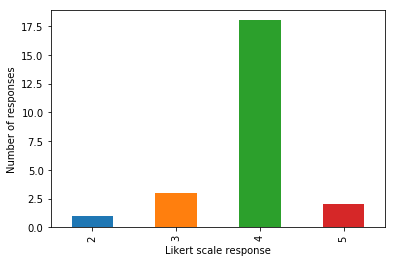

In [115]:
import matplotlib.pyplot as plt
temp = choice_words.drop(choice_words.columns[0:1],axis=1)
#temp[temp.columns[0]].value_counts()
data = pd.value_counts(temp[temp.columns[0]], sort=False)
data.plot(kind='bar')
plt.ylabel('Number of responses')
plt.xlabel('Likert scale response')
plt.show()

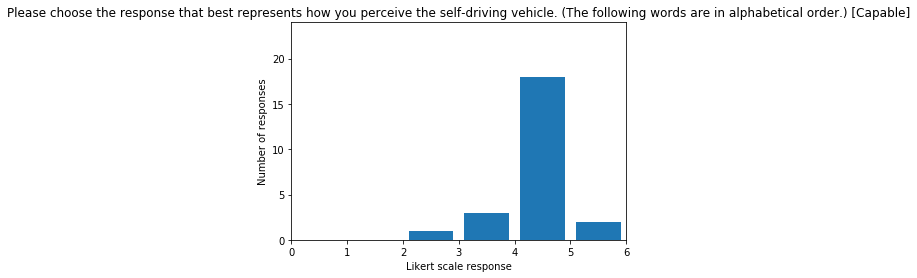

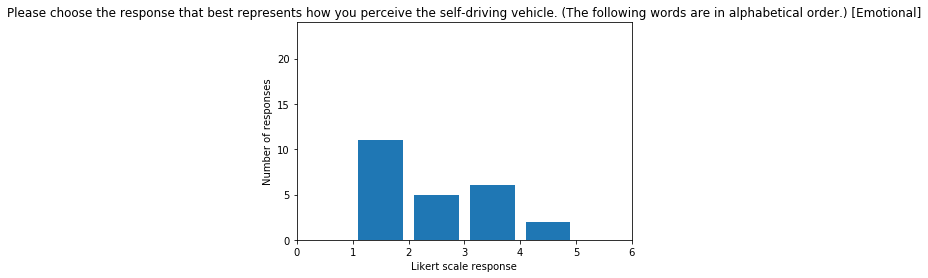

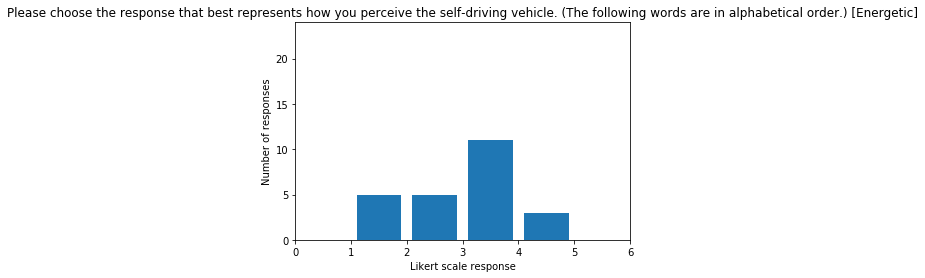

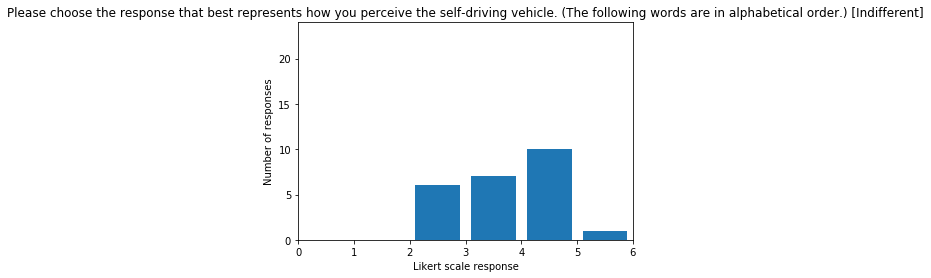

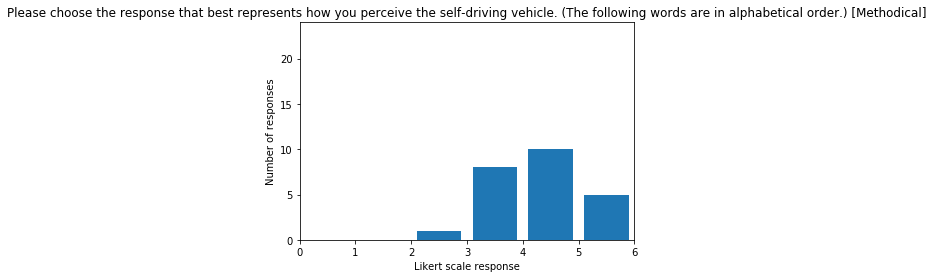

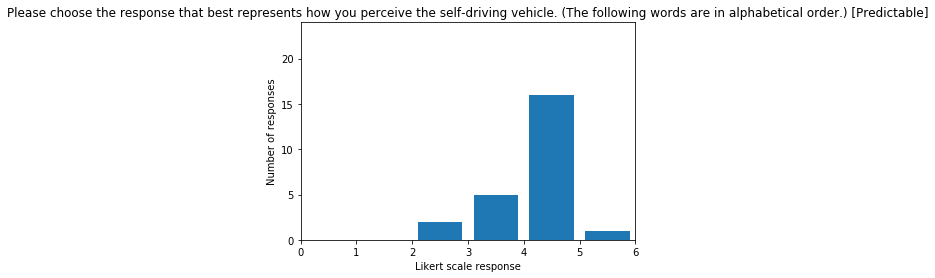

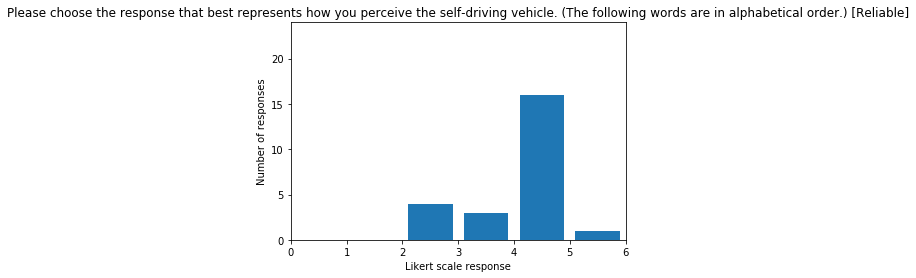

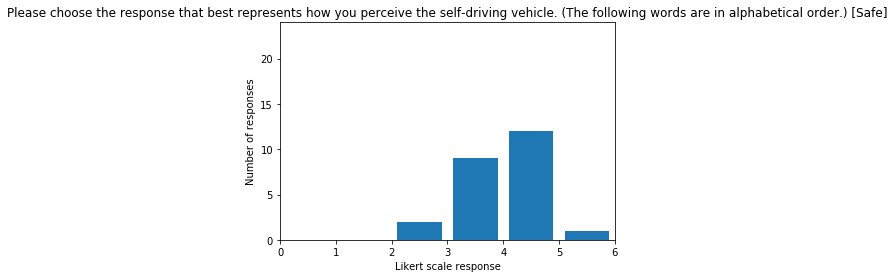

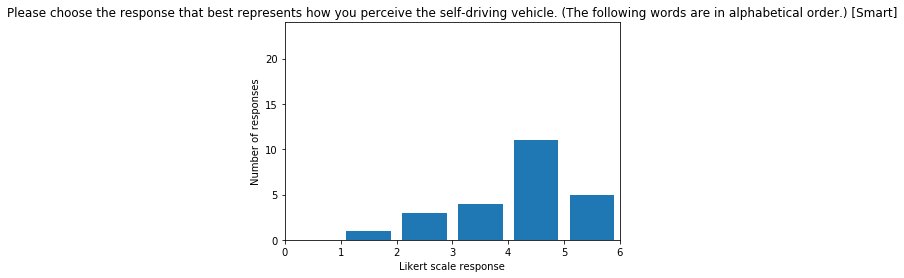

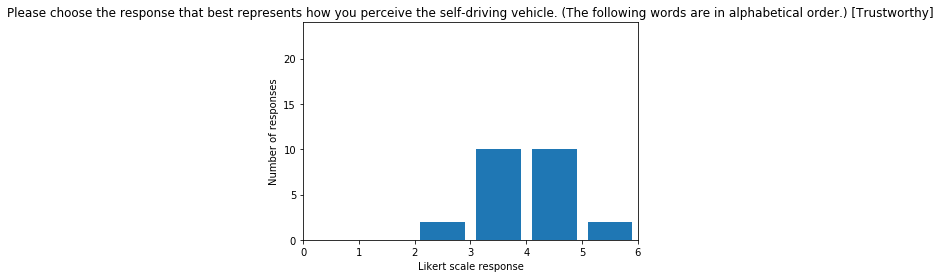

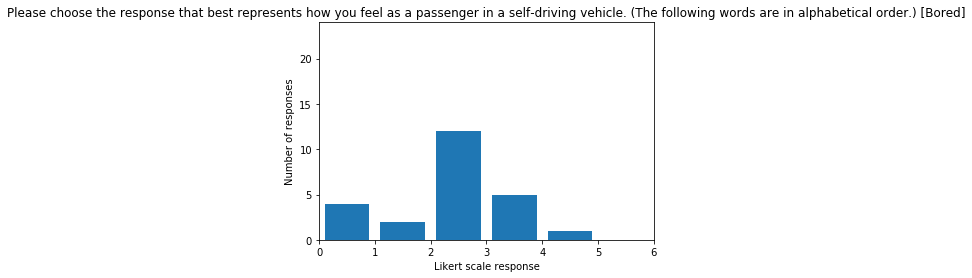

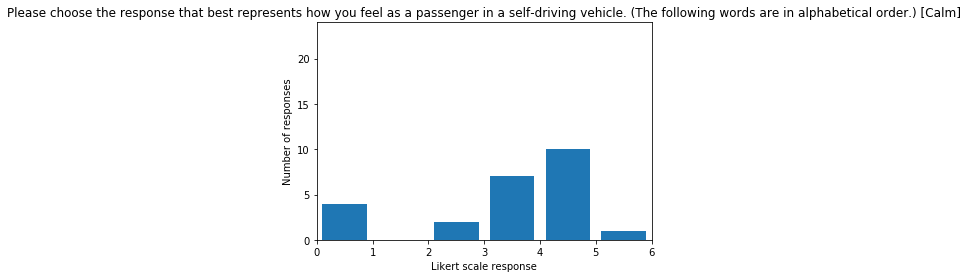

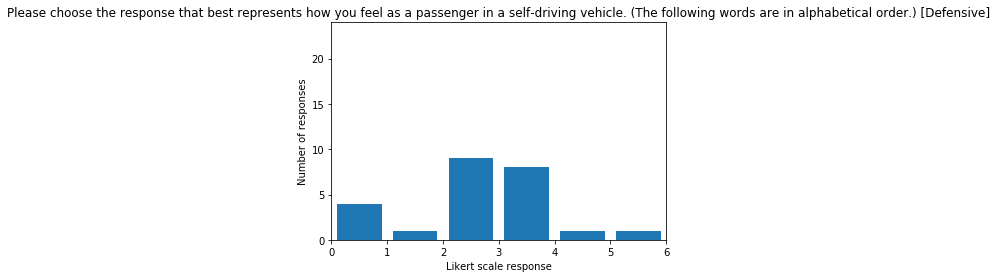

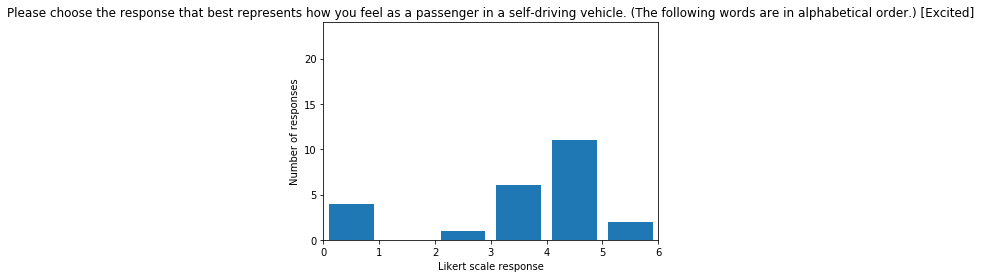

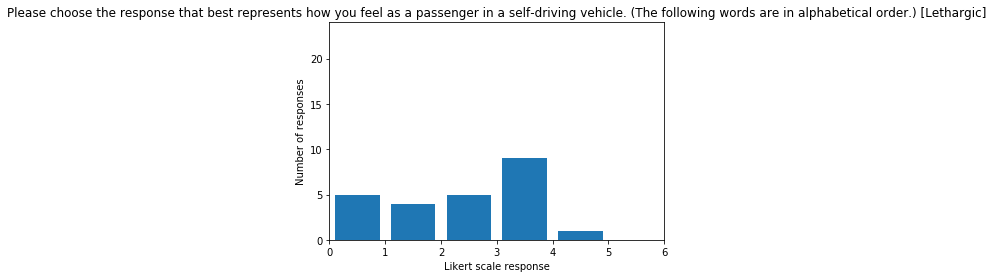

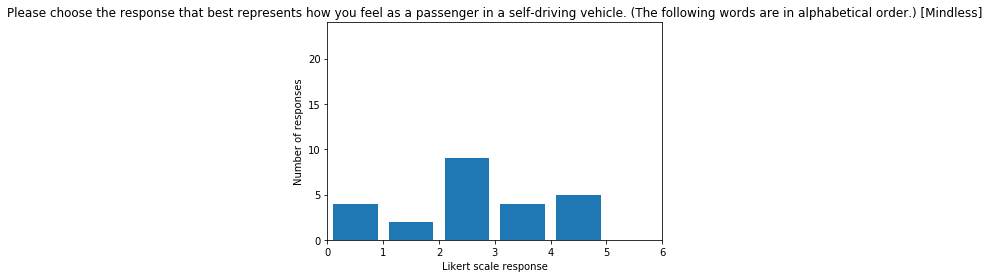

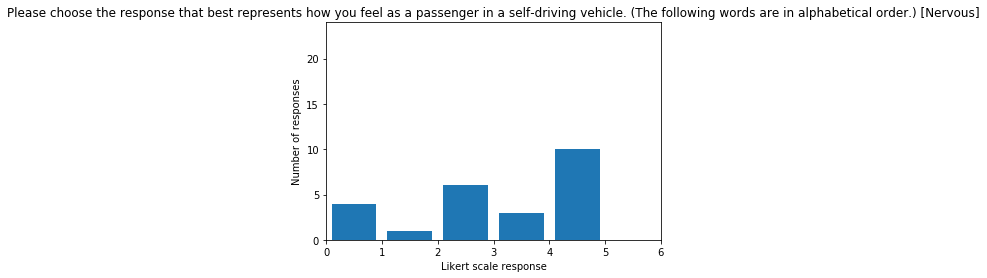

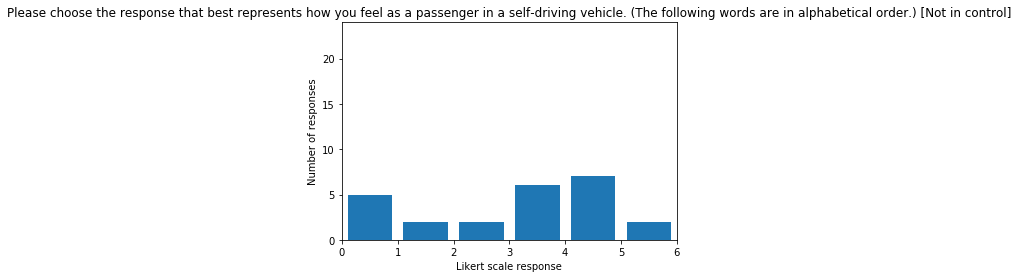

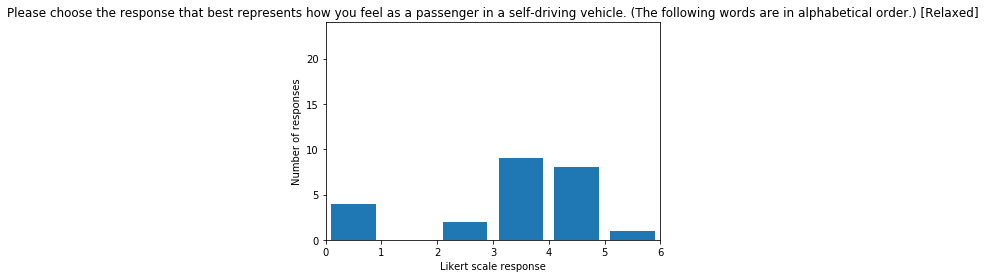

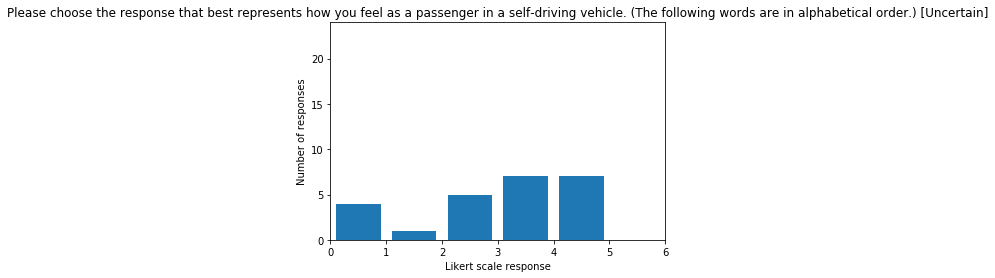

In [195]:
for i in range(1,len(choice_words.columns)):
    temp = choice_words.drop(choice_words.columns[0:i],axis=1)
    temp[temp.columns[0]].hist(range=(0,6),bins=6,rwidth=0.8)
    ax = plt.gca()
    ax.grid(False)
    plt.ylim([0,24])
    plt.xlim([0,6])
    #data = pd.value_counts(temp[temp.columns[0]], sort=False)
    #ax = plt.gca()
    #data.plot(kind='bar')
    plt.ylabel('Number of responses')
    plt.xlabel('Likert scale response')
    plt.title(list(choice_words)[i])
    plt.show()